In [47]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
dtregressor = DecisionTreeRegressor()


df = pd.read_excel("real_estate_data.xlsx",'Real_Estate_data')
print (df.count())

df.corr() #get the correlation matrix to see to which level the dataset attributes are correlated, that will affect selecting attributes in building the forecasting model
# the matrix inform us that there is a strong relationship between pricem age, area, and floor
#df.corr()['SalePrice'] #to get correlation for specific field with other atributes

SalePrice      5891
BuildingAge    5891
Area           5891
Floor          5891
Location       5891
dtype: int64


,SalePrice,BuildingAge,Area,Floor,Location
SalePrice,1.000000,0.447875,0.697199,0.336729,0.010615
BuildingAge,0.447875,1.000000,0.021282,0.260568,0.005180
Area,0.697199,0.021282,1.000000,0.179491,0.017981
Floor,0.336729,0.260568,0.179491,1.000000,0.005355
Location,0.010615,0.005180,0.017981,0.005355,1.000000


In [48]:
#selection to attributes where according to the correlation
X = df[['BuildingAge','Area','Floor']]
y = df[['SalePrice']]

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50)
dtregressor.fit(X_train, y_train)

DecisionTreeRegressor()

In [50]:
print (dtregressor.predict([[1995,280,10]]))#prediction for apartment, with building age 1995, area 280, and floor 10

[56067.85714286]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  "X does not have valid feature names, but"


In [51]:
#Model Evaluation
from sklearn import metrics
y_pred = dtregressor.predict(X_test)
#Model Evaluation
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred)) #Check the accuracty when changing the sample size

Mean Absolute Error (MAE): 39233.11024955565
Mean Squared Error (MSE): 2704733021.0501466
Explained Variance Score: 0.759896893013769
Mean Squared Log Error: 0.06866690169558214
Median Absolute Error: 31526.416666666664
R^2: 0.7589569372610707


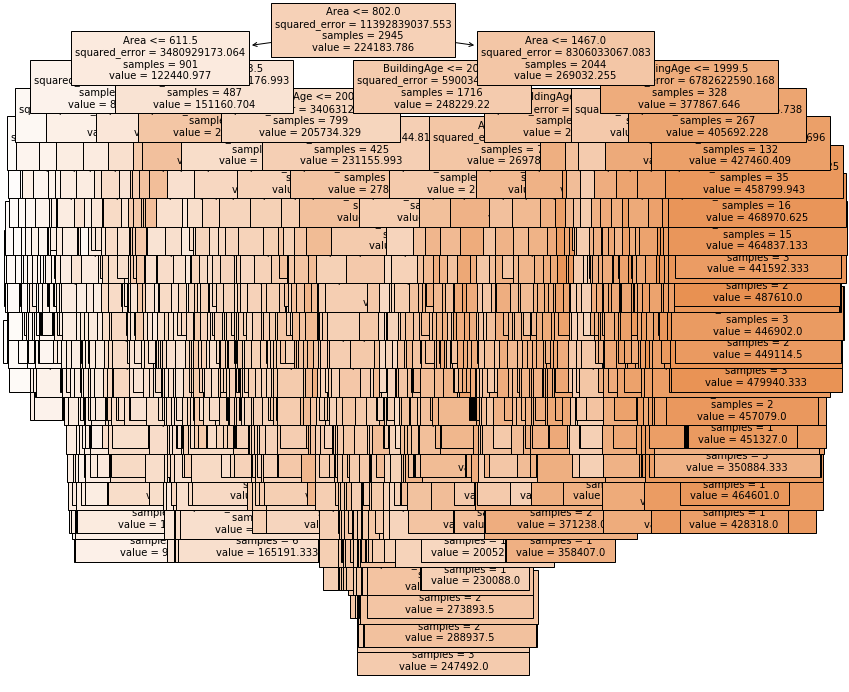

In [54]:
#pip install --upgrade pip
#pip install --upgrade scikit-learn
import matplotlib.pyplot as plt 
from sklearn import tree
plt.figure(figsize=(12,12))#inches, very important to have clear visuals
tree.plot_tree(dtregressor,feature_names= ('BuildingAge','Area','Floor'),class_names=True,filled=True,fontsize=10)#If max depth is removed, all tree will be generated
plt.savefig('Model.png')

In [82]:
from sklearn.ensemble import RandomForestRegressor # Import Nearest kneighor
rfregressor = RandomForestRegressor()
rfregressor.fit(X_train, y_train)
print (rfregressor.predict([[1995,280,10]]))#prediction for 2020
#Model Evaluation
from sklearn import metrics
y_pred = rfregressor.predict(X_test)
#Model Evaluation
print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Explained Variance Score:', metrics.explained_variance_score(y_test, y_pred))
print('Mean Squared Log Error:', metrics.mean_squared_log_error(y_test, y_pred))
print('Median Absolute Error:', metrics.median_absolute_error(y_test, y_pred))
print('R^2:', metrics.r2_score(y_test, y_pred))

[55541.56]
Mean Absolute Error (MAE): 37600.86441685915
Mean Squared Error (MSE): 2392045983.8393435
Explained Variance Score: 0.7907804759958617
Mean Squared Log Error: 0.06452589823517436
Median Absolute Error: 30910.088333333348
R^2: 0.7905300203911398


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


# import pickle and forecasting from saved model

In [41]:
import pickle
pkl_filename = "pickle_model.pkl"
with open(pkl_filename, 'wb') as file:
    pickle.dump(regressor, file)

In [7]:
with open(pkl_filename, 'rb') as file:
    pickle_model = pickle.load(file)
    
Ypredict = pickle_model.predict([[2022,400,15]])
Ypredict

array([[212012.90861885]])

In [8]:
Ypredict= pickle_model.predict([[2022,300,10]])
Ypredict

array([[186280.8349495]])